In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
#path where you stored your copy of the nuScenes dataset.
DATAROOT = Path('/home/saramontese/Desktop/MasterThesis/example/dataset/data/sets/nuscenes')
dataset_file = 'train_v1.0-trainval_lidar_3.csv'

# Data Analysis


The dataset contains the following columns for each state of the self-driving car:

- instance_token: A unique identifier for the vehicle instance.
- translation: The vehicle's position in 3D space (x, y, z coordinates).
- yaw: The orientation of the vehicle around the vertical axis (rotation angle).
- velocity: The vehicle's speed in a given direction.
- acceleration: The change in velocity over time.
- heading_change_rate: The rate of change of the vehicle's direction.
- timestamp: The time at which the state was recorded.
- scene_token: A unique identifier for the scenario or environment the vehicle is in

Load the CSV data into a DataFrame


In [3]:

dtype_dict = {
    'modality': 'category',  # for limited set of modalities, 'category' is efficient
    'scene_token': 'str',
    'steering_angle':'float64',
    'location':'str',  
    'timestamp': 'str',  # To enable datetime operations
    'rotation': 'object',  # Quaternion (lists)
    'x': 'float64',
    'y': 'float64',
    'z': 'float64',
    'yaw': 'float64',  
    'velocity': 'float64',
    'acceleration': 'float64',
    'yaw_rate': 'float64'
}
df = pd.read_csv(DATAROOT / dataset_file, dtype=dtype_dict, parse_dates=['timestamp'])

df.head()

,sample_token,scene_token,steering_angle,location,CAM_FRONT_RIGHT,CAM_FRONT_LEFT,CAM_BACK_RIGHT,CAM_BACK_LEFT,CAM_FRONT,CAM_BACK,modality,timestamp,rotation,x,y,z,yaw,velocity,yaw_rate,acceleration
0,3481dbfd65864925b4a4b2d6b7256d44,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('movable_object.trafficcone', ''): 1, ('huma...","{('vehicle.car', 'vehicle.parked'): 2, ('vehic...","{('movable_object.trafficcone', ''): 1}","{('vehicle.car', 'vehicle.stopped'): 1, ('vehi...","{('human.pedestrian.adult', 'pedestrian.standi...","{('vehicle.car', 'vehicle.stopped'): 4, ('vehi...",lidar,2018-07-27 16:20:29.048702,"[0.27668389210179944, -0.0026796705507768723, ...",427.968583,1622.155828,0.0,2.580930,0.000004,0.000033,0.000000
1,394d87634b6c46049c2f06e84026096a,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('movable_object.trafficcone', ''): 1, ('huma...","{('vehicle.car', 'vehicle.parked'): 2, ('vehic...","{('movable_object.trafficcone', ''): 1}","{('vehicle.car', 'vehicle.stopped'): 1, ('vehi...","{('vehicle.trailer', 'vehicle.moving'): 1, ('h...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:29.548597,"[0.27667585323668453, -0.002728894247491543, 0...",427.968582,1622.155829,0.0,2.580947,0.000004,0.000033,0.000000
2,656b4207ba9542b2a9bb7c03aa61b325,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('movable_object.trafficcone', ''): 1, ('huma...","{('vehicle.car', 'vehicle.parked'): 2, ('vehic...","{('movable_object.trafficcone', ''): 1}","{('vehicle.car', 'vehicle.stopped'): 1, ('vehi...","{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.048445,"[0.2766247744031405, -0.0027369692279543625, 0...",427.968589,1622.155824,0.0,2.581053,0.000018,0.000212,0.000028
3,2f789ae558a84df9b8daee0674a7985f,0053e9c440a94c1b84bd9c4223efc4b0,0.179841,boston-seaport,"{('movable_object.trafficcone', ''): 1, ('huma...","{('vehicle.car', 'vehicle.parked'): 2, ('vehic...","{('movable_object.trafficcone', ''): 1}","{('vehicle.car', 'vehicle.stopped'): 1, ('vehi...","{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:30.548859,"[0.27663215946727443, -0.002737971665731827, 0...",427.968593,1622.155822,0.0,2.581038,0.000008,-0.000031,-0.000020
4,623e58c15be546b39a36796a5b03d18f,0053e9c440a94c1b84bd9c4223efc4b0,0.178096,boston-seaport,"{('movable_object.trafficcone', ''): 1, ('huma...","{('vehicle.car', 'vehicle.parked'): 1, ('vehic...","{('human.pedestrian.adult', 'pedestrian.moving...","{('vehicle.car', 'vehicle.stopped'): 1, ('vehi...","{('vehicle.trailer', 'vehicle.moving'): 1, ('v...","{('vehicle.car', 'vehicle.stopped'): 4, ('huma...",lidar,2018-07-27 16:20:31.048731,"[0.27662503731230986, -0.002729398219646146, 0...",427.968591,1622.155823,0.0,2.581052,0.000004,0.000029,-0.000008


In [4]:
df.shape

(26683, 20)

### Variantion for position, velocity, acceleration, yaw, heading_change_rate

In [5]:
# Group by 'scene_token'
grouped_df = df.groupby('scene_token')

# Differences for each feature
delta_df = pd.DataFrame({
    'x_diff': grouped_df['x'].diff(),
    'y_diff': grouped_df['y'].diff(),
    'z_diff': grouped_df['z'].diff(),
    'velocity_diff': grouped_df['velocity'].diff(),
    'acceleration_diff': grouped_df['acceleration'].diff(),
    'yaw_diff': grouped_df['yaw'].diff(),
    'yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'steering_angle_diff': grouped_df['steering_angle'].diff()
})


In [6]:
# Absolute differences for each feature
abs_df = pd.DataFrame({
    'abs_x_diff': grouped_df['x'].diff().abs(),
    'abs_y_diff': grouped_df['y'].diff().abs(),
    'abs_z_diff': grouped_df['z'].diff().abs(),
    'abs_velocity_diff': grouped_df['velocity'].diff().abs(),
    'abs_acceleration_diff': grouped_df['acceleration'].diff().abs(),
    'abs_yaw_diff': grouped_df['yaw'].diff().abs(),
    'abs_yaw_rate_diff': grouped_df['yaw_rate'].diff(),
    'abs_steering_angle_diff': grouped_df['steering_angle'].diff()
})

### Feature analysis

####  Original Dataset

In [7]:
numeric_columns = ['velocity', 'acceleration', 'yaw', 'yaw_rate', 'steering_angle']

stats = df[numeric_columns].describe()
stats.loc[['mean', 'std', 'min', 'max']]

,velocity,acceleration,yaw,yaw_rate,steering_angle
mean,5.167965e+00,-0.000962,0.260745,-0.001743,-0.024180
std,3.641600e+00,0.623606,1.844253,0.782754,1.083637
min,3.050844e-09,-4.839118,-3.141337,-15.664581,-8.518880
max,1.773620e+01,3.383211,3.141424,15.413213,8.705702


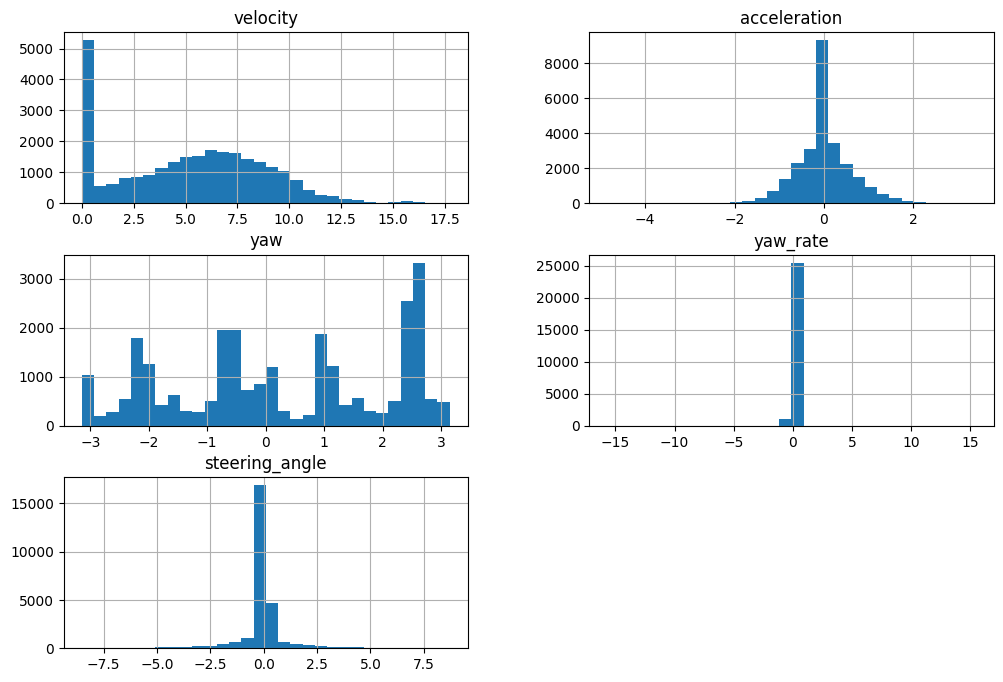

In [8]:
df[numeric_columns].hist(bins=30, figsize=(12, 8))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

#### Acceleration Box Plot to determine acceleration Threshold 

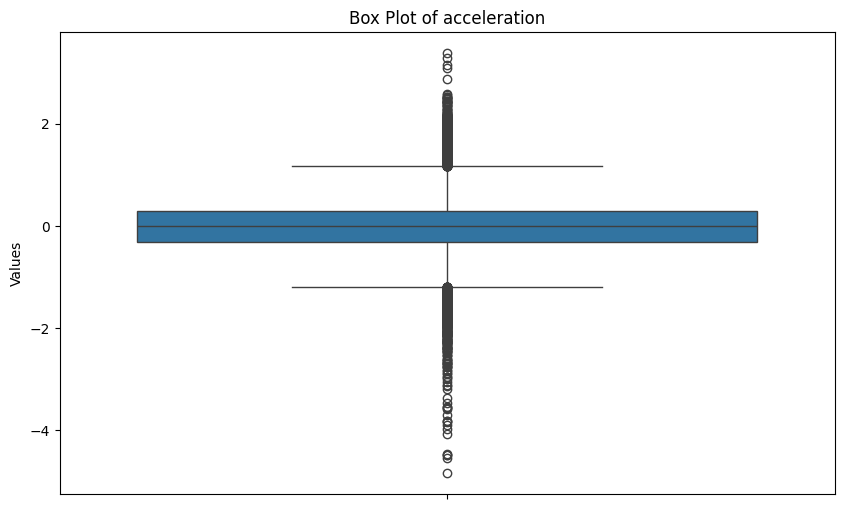

In [9]:
import seaborn as sns

# Alternatively, using seaborn for a more polished plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='acceleration')
plt.title('Box Plot of acceleration')
plt.ylabel('Values')
plt.show()

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)

IQR = Q3 - Q1
        
#without outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
        
#df = df[(df['acceleration'] >= lower_bound) & (df['acceleration'] <= upper_bound)]
        
#Q1 = df['acceleration'].quantile(0.25)
#Q3 = df['acceleration'].quantile(0.75)
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

Q1: -0.3084105341160428
Q3: 0.28454006051945585



#### Distribution of Annotations for each scene

Plot distribution of object counts in front-left and front-right cameras, across all scenes. We do not consider static and movable objects.

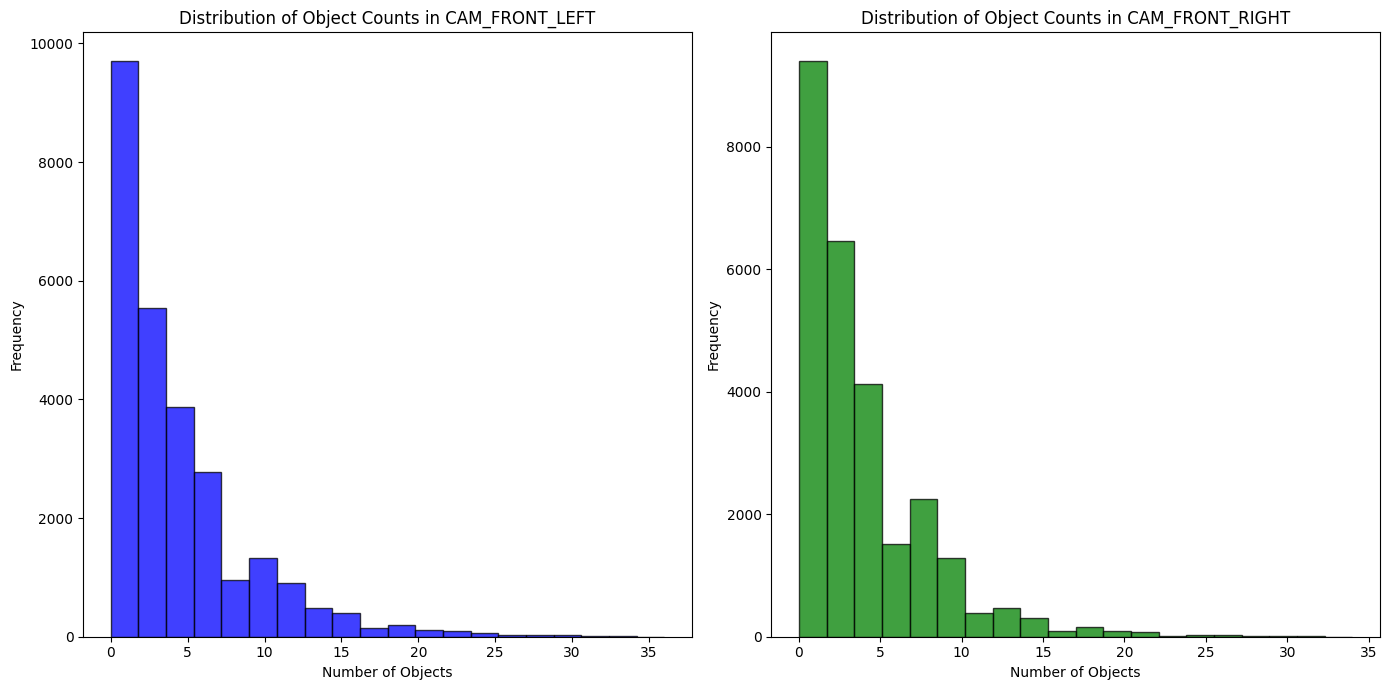

In [13]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

results = {}

cameras = ['CAM_FRONT_LEFT', 'CAM_FRONT_RIGHT']

# Lists to hold counts for plotting
cam_left_counts = []
cam_right_counts = []

# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene]
    
    scene_results = []
    
    # Loop through each frame in the scene
    for _, frame in scene_df.iterrows():
        n_detections = {}
        
        # Loop through each camera type
        for cam_type in cameras:
            tot_count = 0
            objects = frame[cam_type]
            
            # Parse the objects and count the valid ones
            for (category, _), count in ast.literal_eval(objects).items():
                # Filter useful categories only
                tot_count += count
            
            # Store the total count for the current camera type
            n_detections[cam_type] = tot_count
            
            # Append counts to respective lists for plotting
            if cam_type == 'CAM_FRONT_LEFT':
                cam_left_counts.append(tot_count)
            elif cam_type == 'CAM_FRONT_RIGHT':
                cam_right_counts.append(tot_count)
        
        # Store the counts for the current frame in the scene
        scene_results.append(n_detections)
    
    # Store the counts for the current scene
    results[scene] = scene_results

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(cam_left_counts, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Object Counts in CAM_FRONT_LEFT')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cam_right_counts, bins=20, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution of Object Counts in CAM_FRONT_RIGHT')
plt.xlabel('Number of Objects')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


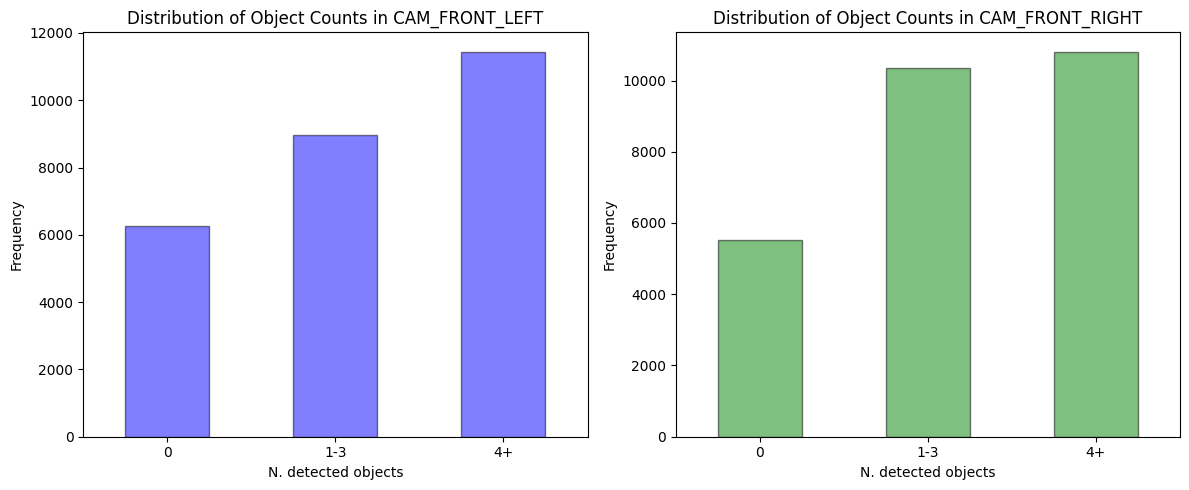

In [23]:
# Discretize the counts into 3 chunks '0', '1-2', '2+'
cam_front_discretized = pd.cut(cam_left_counts, bins=[-1, 0 ,3,100], labels=['0','1-3', '4+'])#,labels=['0', '1-2', '2+'])#, labels=['Low', 'Medium', 'High'])
cam_back_discretized = pd.cut(cam_right_counts,bins=[-1, 0 ,3,100],labels = ['0','1-3', '4+'])#,labels=['0', '1-2', '2+'])#, labels=['Low', 'Medium', 'High'])

#cam_front_discretized = pd.qcut(cam_left_counts, q=3)
#cam_back_discretized = pd.qcut(cam_right_counts,q=3)
# Plotting the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cam_front_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Object Counts in CAM_FRONT_LEFT')
plt.xlabel('N. detected objects')#'Object Count Discretization')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  

plt.subplot(1, 2, 2)
cam_back_discretized.value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black', alpha=0.5)
plt.title('Distribution of Object Counts in CAM_FRONT_RIGHT')
plt.xlabel('N. detected objects')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 

plt.tight_layout()
plt.show()

Plot distribution of pedestrian counts in all 6 cameras, across all scenes.

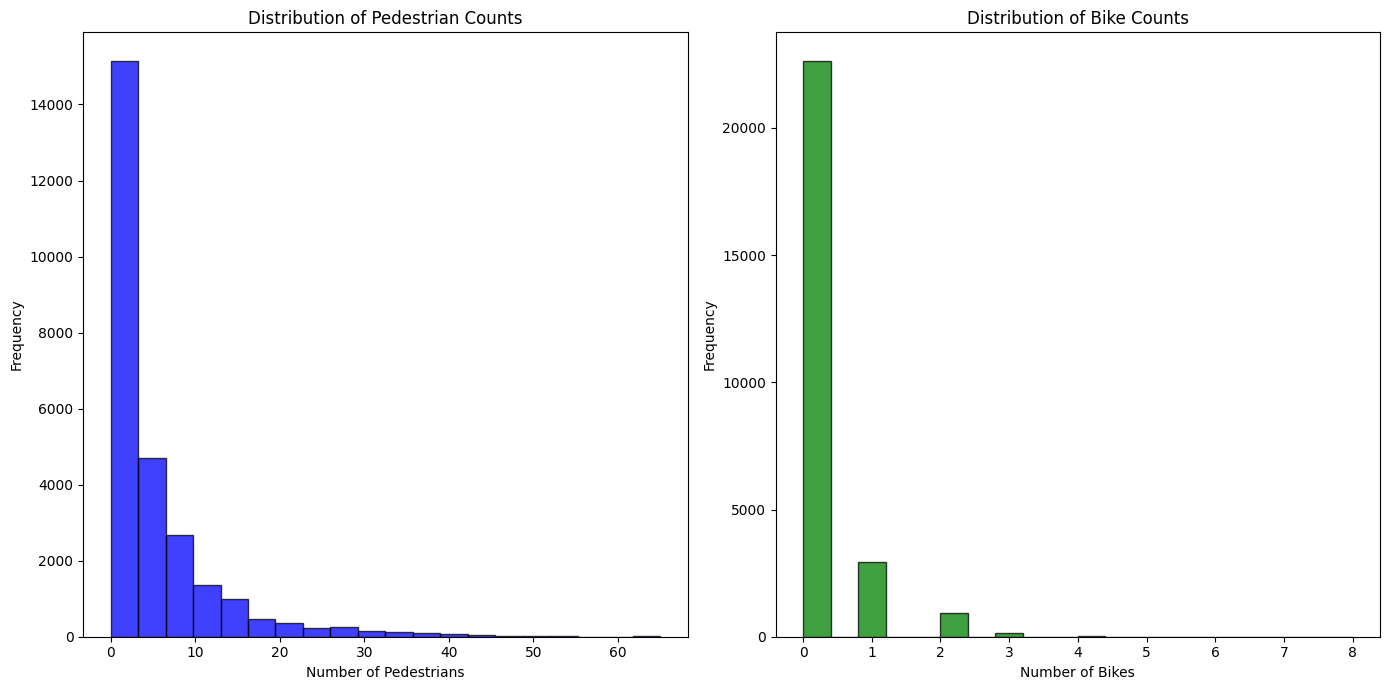

In [15]:
import matplotlib.pyplot as plt


camera_cols = [col for col in df.columns if 'CAM' in col]

# Lists to hold counts for plotting
pedestrian_counts = []
bike_counts = []
# Loop through each unique scene
for scene in df['scene_token'].unique():
    scene_df = df[df['scene_token'] == scene]
    scene_df = scene_df[camera_cols]

    # Loop through each frame in the scene
    for _, frame in scene_df.iterrows():        
        tot_ped_count = 0
        tot_bike_count = 0
        # Loop through each camera type
        for cam_type, objects in frame.items():            
            for (category, attribute), count in ast.literal_eval(objects).items():
                if 'human.pedestrian' in category:
                    if 'personal_mobility' in category and 'with_rider' in attribute: #scooter
                        tot_bike_count+=count
                    else:
                        tot_ped_count +=count
                elif 'cycle' in category and 'with_rider' in attribute:
                    tot_bike_count +=count

            
            
        pedestrian_counts.append(tot_ped_count)
        bike_counts.append(tot_bike_count)
    

# Plotting the distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(pedestrian_counts, bins=20, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Pedestrian Counts')
plt.xlabel('Number of Pedestrians')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bike_counts, bins=20, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution of Bike Counts')
plt.xlabel('Number of Bikes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


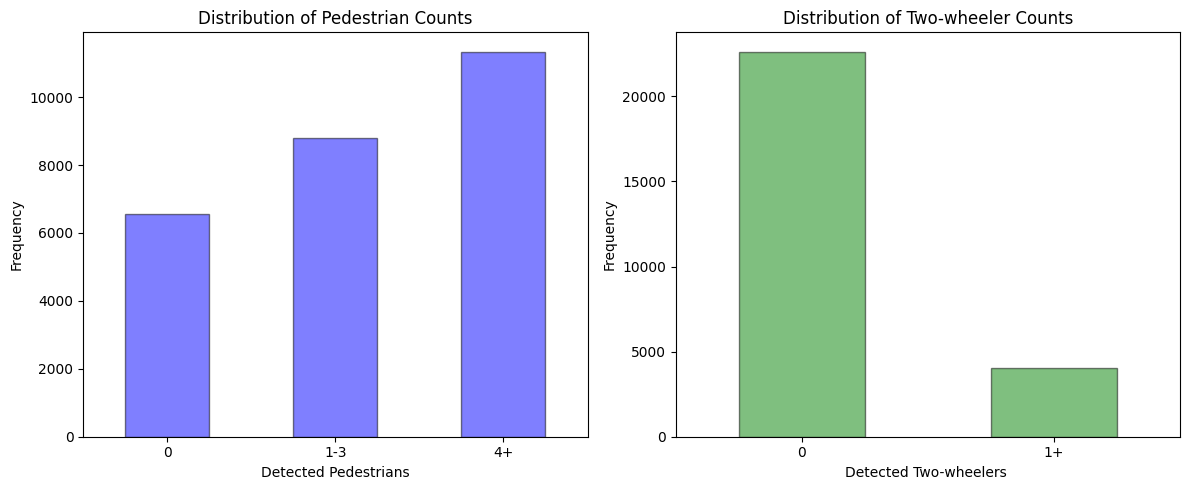

In [14]:
# Discretize the counts into 3 chunks '0', '1-2', '2+'
#pedestrian_discretized = pd.cut(pedestrian_counts, bins=[-1, 0, 100], labels=['0','1+'])
#bike_discretized = pd.cut(bike_counts,bins=[-1, 0,100],labels = ['0','1+'])


pedestrian_discretized = pd.cut(pedestrian_counts, bins=[-1, 0, 3, 1000], labels=['0','1-3', '4+'])
bike_discretized = pd.cut(bike_counts,bins=[-1, 0,1000],labels = ['0','1+'])
# Plotting the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
pedestrian_discretized.value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black', alpha=0.5)
plt.title('Distribution of Pedestrian Counts')
plt.xlabel('Detected Pedestrians')#'Object Count Discretization')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  

plt.subplot(1, 2, 2)
bike_discretized.value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black', alpha=0.5)
plt.title('Distribution of Two-wheeler Counts')
plt.xlabel('Detected Two-wheelers ')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 

plt.tight_layout()
plt.show()

### Correlation Matrix

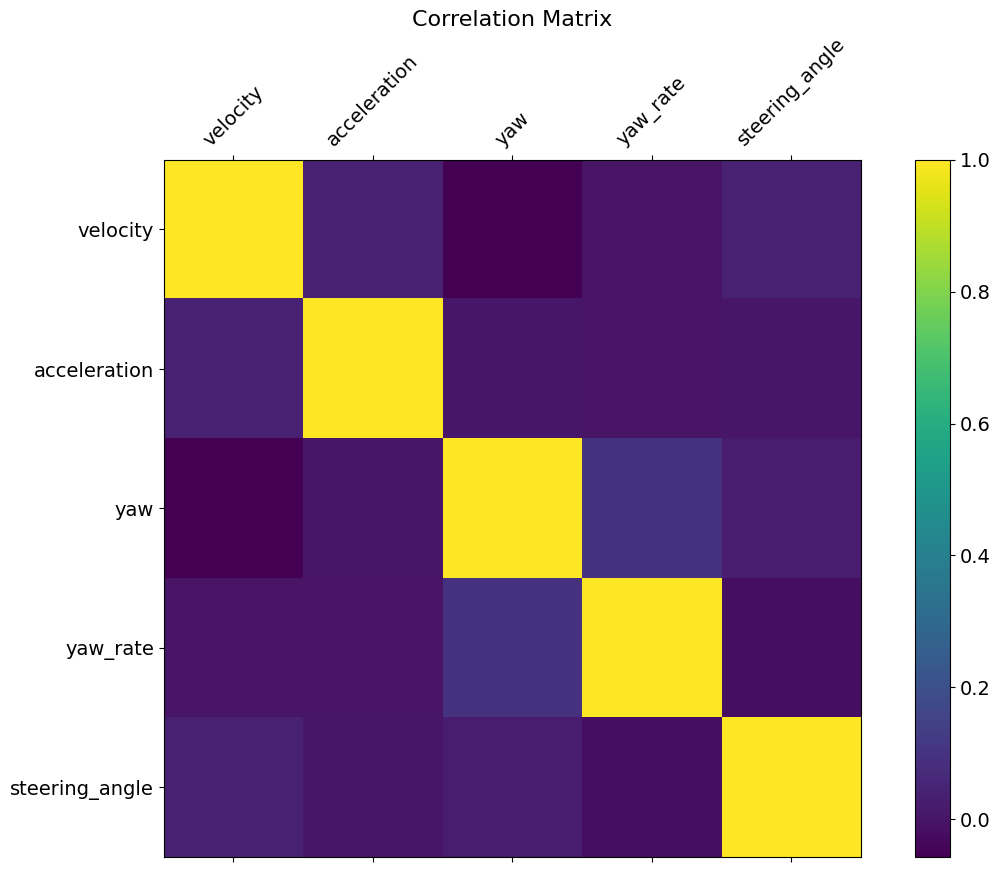

In [15]:
f = plt.figure(figsize=(14, 9))
plt.matshow(df[numeric_columns].corr(), fignum=f.number)
plt.xticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Variation  Dataset

In [16]:
stats = delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff','yaw_rate_diff', 'steering_angle_diff']].describe()
stats.loc[['mean', 'std', 'min', 'max']]


,x_diff,y_diff,z_diff,velocity_diff,acceleration_diff,yaw_diff,yaw_rate_diff,steering_angle_diff
mean,0.003983,-0.011231,0.0,-0.000429,-0.000780,-0.000395,0.001861,0.001088
std,2.365560,2.095290,0.0,0.314522,0.417629,0.384228,1.091528,0.279713
min,-7.939933,-7.240155,0.0,-2.418950,-3.468057,-6.282092,-25.090462,-3.790855
max,8.450918,6.814903,0.0,1.695012,3.209952,6.278255,15.763745,4.827581


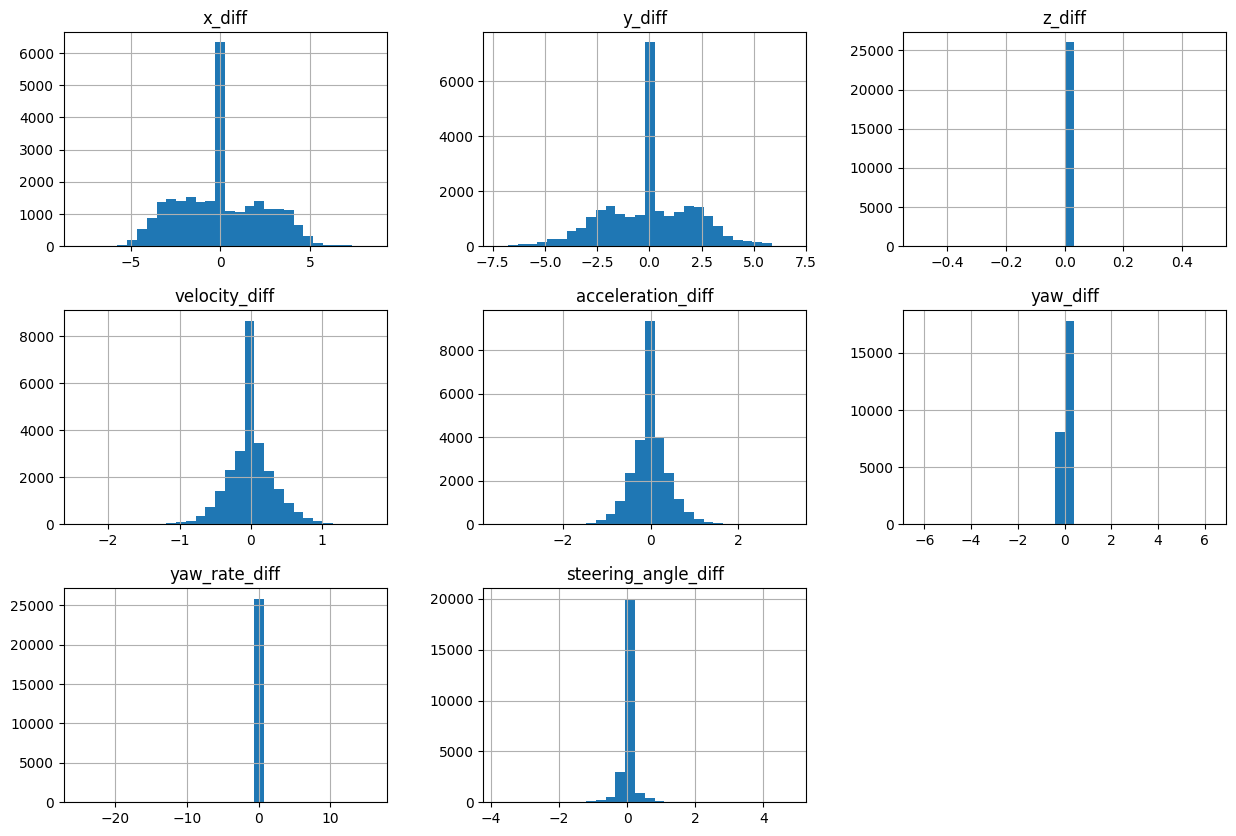

In [17]:
delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff','yaw_rate_diff', 'steering_angle_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

Correlation Matrix


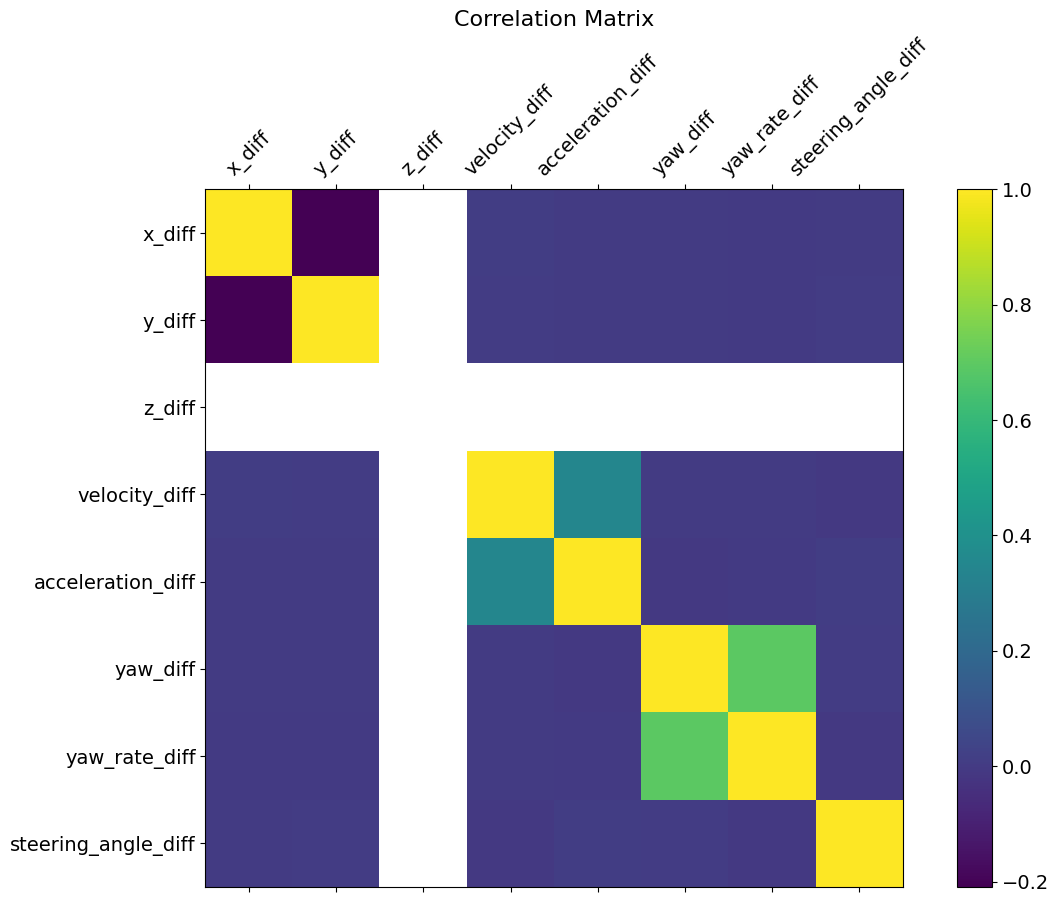

In [18]:
f = plt.figure(figsize=(14, 9))
plt.matshow(delta_df.corr(), fignum=f.number)
plt.xticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Absolute Variation Dataset

In [19]:
abs_stats = abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].describe()
abs_stats.loc[['mean', 'std', 'min', 'max']]


KeyError: "['abs_heading_change_rate_diff'] not in index"

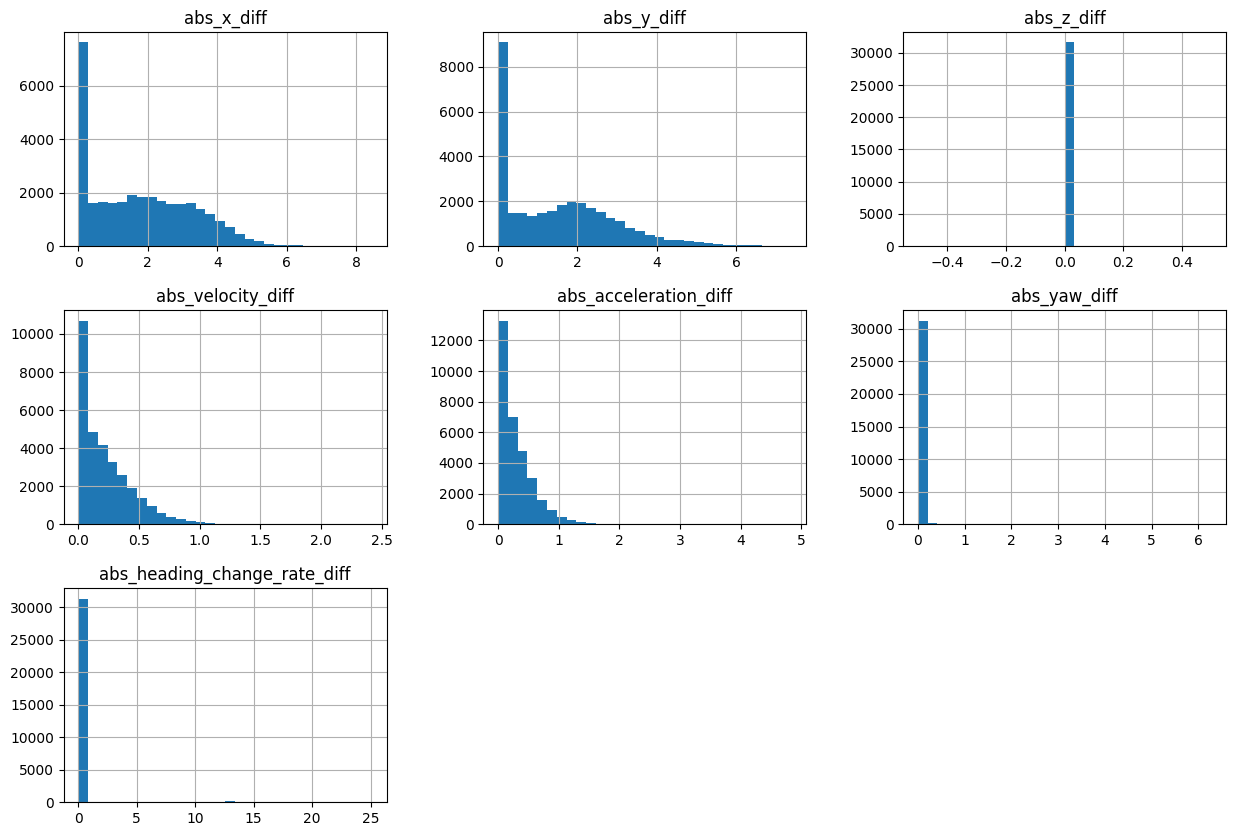

In [ ]:
abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

- x_diff: Since these have broader distributions, setting a threshold might require some context of the movement. If you're looking to detect significant lateral movements (e.g., lane changes), you might set a threshold around the higher frequency lower-end values.

- y_diff:

- z_diff: The z differences are concentrated near zero, indicating that there is very little change in the vertical position, which is expected for a vehicle traveling on relatively flat surfaces.


- velocity_diff: high concentration at the lower end, suggesting that velocity changes between consecutive measurements are generally small, with occasional larger changes. Plausible threshold to detect meaningful acceleration or deceleration might be set just above the most frequent low-end changes, possibly in the range where the histogram bars start to significantly lower. (0.1-0.2 m/s)


- acceleration_diff: most acceleration changes are close to zero, with a few instances of larger differences. This pattern is typical for driving in urban environments, where acceleration and deceleration are frequent but not extreme. Threshold might be set at a value that excludes the majority of these minor changes but captures the less frequent larger changes.


- yaw_diff: histogram is highly skewed towards smaller values, indicating that most of the time, there are only slight changes in orientation, which corresponds to driving mostly straight with occasional turns.


- heading_change_rate_diff: Similar to yaw_diff, the histogram for heading change rate differences is skewed towards smaller values. The vehicle mostly maintains its heading with only slight variations within the sampled timeframe.
